In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from utilfns import *  
from scipy.integrate import odeint
# %run utilfns.py
plt.rcParams['text.usetex'] =  True

# Homework #2
S. Mangan and U. Alon. "Structure and function of the feed-forward loop network motif." Proceedings of the National Academy of Sciences 100.21 (2003): 11980-11985.

# Figure 2

In [2]:
# sr_AND_coh1 = {
#     'header':None
#     'gate':'OR',
#     'regXY':'act', 
#     'regXZ':'act',
#     'regYZ':'act',
#     'H':2,
#     'Kxz':1,
#     'Kyz': None,
#     'Kxy':.1,
#     'By':0, 
#     'Bz':0, 
#     'Cy':1, 
#     'Cz':1, 
#     'Ay':1, 
#     'Az':1,
#     'dt':.005,
#     'start_time':.1,
#     'tTotal': 5,
#     'xWidth': 3,
#     'yWidth': 5,
# }

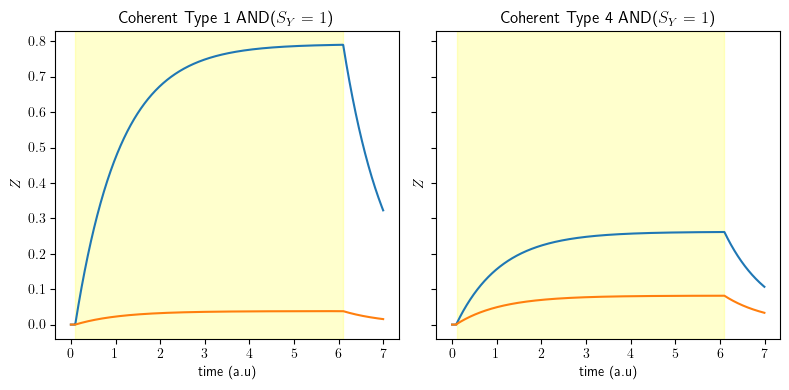

In [3]:

%run utilfns.py

fig2a = {
    'header':'Coherent Type 1 AND($S_Y=1$)',
    'gate':'AND',
    'regXY':'act', 
    'regXZ':'act',
    'regYZ':'act',
    'H':2,
    'Kxz':.1,
    'Kyz': None,
    'Kxy':.1,
    'By':0, 
    'Bz':0, 
    'Cy':1, 
    'Cz':1, 
    'Ay':1, 
    'Az':1,
    'dt':0.005,
    'start_time':.1,
    'tTotal': 7,
    'xWidth': 6,
    'yWidth': 7,
}
fig2b = {
    'header':'Coherent Type 4 AND($S_Y=1$)',
    'gate': 'AND',
    'regXY':'rep', 
    'regXZ':'act',
    'regYZ':'rep',
    'H': 2,
    'Kxy': 0.1,
    'Kxz': 0.1,
    'Kyz': None,
    'By':0, 
    'Bz':0, 
    'Cy':1, 
    'Cz':1, 
    'Ay':1, 
    'Az':1,
    'dt':0.005,
    'start_time':.1,
    'tTotal': 7,
    'xWidth': 6,
    'yWidth': 7,
}


fig2, ax2 = plt.subplots(1, 2, figsize=(8,4), sharey=True)
Kyz_a = [.5, 5]
for i in Kyz_a:
    fig2a['Kyz'] = i
    subplotGenr(fig2a, [1, 0], ax2[0])

Kyz_b = [.6,.3]

for kyzb_i in Kyz_b:
    fig2b['Kyz'] = kyzb_i
    subplotGenr(fig2b, [1, 0], ax2[1])
    
plt.tight_layout()
# plt.savefig('fig2.png', dpi=450)
plt.show()


# Figure 3

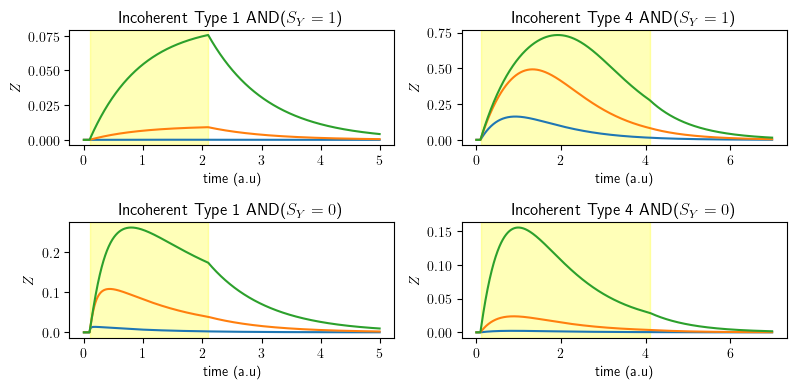

In [53]:
%run utilfns.py
fig3a = {
    'header':'Incoherent Type 1 AND($S_Y=1$)',
    'gate':'AND',
    'regXY':'act', 
    'regXZ':'act',
    'regYZ':'rep',
    'H':2,
    'Kxz':.1,
    'Kyz':None,  #[.01, .1, .3],
    'Kxy':.1,
    'By':0, 
    'Bz':0, 
    'Cy':1, 
    'Cz':1, 
    'Ay':1, 
    'Az':1,
    'dt':.005,
    'start_time':.1,
    'tTotal': 5,
    'xWidth': 2,
    'yWidth': 5,
}

fig3b = {
    'header':'Incoherent Type 4 AND($S_Y=1$)',
    'gate':'AND',
    'regXY':'rep', 
    'regXZ':'act',
    'regYZ':'act',
    'H':2,
    'Kxz':.1,
    'Kyz':None,  #[.01, .1, .3],
    'Kxy':.1,
    'By':0, 
    'Bz':0, 
    'Cy':1, 
    'Cz':1, 
    'Ay':1, 
    'Az':1,
    'dt':.005,
    'start_time':.1,
    'tTotal': 7,
    'xWidth': 4,
    'yWidth': 7,
}



fig3c = {
    'header':'Incoherent Type 1 AND($S_Y=0$)',
    'gate':'AND',
    'regXY':'act', 
    'regXZ':'act',
    'regYZ':'rep',
    'H':2,
    'Kxz':.1,
    'Kyz':None,  #[.01, .1, .3],
    'Kxy':.1,
    'By':0, 
    'Bz':0, 
    'Cy':1, 
    'Cz':1, 
    'Ay':1, 
    'Az':1,
    'dt':.005,
    'start_time':.1,
    'tTotal': 5,
    'xWidth': 2,
    'yWidth': 0,
}


fig3d = {
    'header':'Incoherent Type 4 AND($S_Y=0$)',
    'gate':'AND',
    'regXY':'rep', 
    'regXZ':'act',
    'regYZ':'act',
    'H':2,
    'Kxz':.1,
    'Kyz':None,  #[.01, .1, .3],
    'Kxy':.1,
    'By':0, 
    'Bz':0, 
    'Cy':1, 
    'Cz':1, 
    'Ay':1, 
    'Az':1,
    'dt':.005,
    'start_time':.1,
    'tTotal': 7,
    'xWidth': 4,
    'yWidth': 0,
}

fig3, ax3 = plt.subplots(2, 2, figsize=(8,4))#, sharex=True, sharey=True)
#figure 3ac
kyz_ac = [.01, .1, .3]
for kyzac in kyz_ac:
    fig3a['Kyz'] = kyzac
    fig3c['Kyz'] = kyzac
    subplotGenr(fig3a, [1, 0], ax3[0,0])
    subplotGenr(fig3c, [0, 0], ax3[1,0])
#figure 3bd
Kyz_bd = [1, .3, .1]
for kyzbd in Kyz_bd:
    fig3b['Kyz'] = kyzbd
    fig3d['Kyz'] = kyzbd
    subplotGenr(fig3b, [1, 0], ax3[0,1])
    subplotGenr(fig3d, [0, 0], ax3[1,1])

plt.tight_layout()
# plt.savefig('fig3.png', dpi=450)
plt.show()

# Figure 4

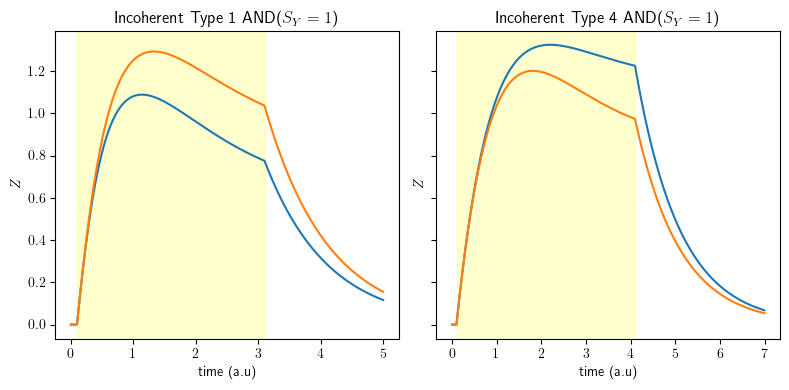

In [32]:
%run utilfns.py


fig4a = {
    'header':'Incoherent Type 1 AND($S_Y=1$)',
    'gate':'AND',
    'regXY':'act', 
    'regXZ':'act',
    'regYZ':'rep',
    'H':2,
    'Kxz':1,
    'Kyz':.5,
    'Kxy':1,
    'By':None, #[.5, .3]
    'Bz':0, 
    'Cy':1, 
    'Cz':6, 
    'Ay':1, 
    'Az':1,
    'dt':.005,
    'start_time':.1,
    'tTotal': 5,
    'xWidth': 3,
    'yWidth': 5
}
fig4b = {
    'header':'Incoherent Type 4 AND($S_Y=1$)',
    'gate':'AND',
    'regXY':'rep', 
    'regXZ':'act',
    'regYZ':'act',
    'H': 2,
    'Kxz':1,
    'Kyz':.5,
    'Kxy':1,#1
    'By':None, #[0.45, 0.35]
    'Cy': 1,
    'Ay': 1,
    'Bz': 0,
    'Cz': 1,#1
    'Az': 1, 
    'dt':.005,
    'start_time':.1,
    'tTotal': 7,
    'xWidth': 4,
    'yWidth': 7
}

fig4, ax4 = plt.subplots(1, 2, figsize=(8,4), sharey=True)

by_a =  [.5, .3]
for bya in by_a:
    fig4a['By'] = bya
    subplotGenr(fig4a, [0, 0], ax4[0])

by_b = [.45, .35]
for byb in by_b:
    fig4b['By'] = byb 
    subplotGenr(fig4b, [1, 0], ax4[1])

plt.tight_layout()
plt.savefig('fig4.png', dpi=450)
plt.show()


# Figure 5

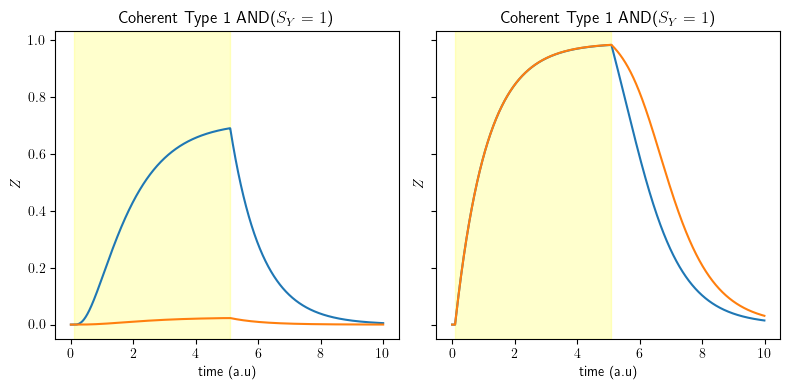

In [132]:
%run utilfns.py

#Modify the parameters, update the dictionary.
fig5a = {
    'header':'Coherent Type 1 AND($S_Y=1$)',
    'gate':'AND',
    'regXY':'act', 
    'regXZ':'act',
    'regYZ':'act',
    'H': 2,
    'Kxz':.1,
    'Kyz':None, #[0.5, 5]
    'Kxy':.5,
    'By':0, 
    'Cy': 1,
    'Ay': 1,
    'Bz': 0,
    'Cz': 1,
    'Az': 1, 
    'dt':.005,
    'start_time':.1,
    'tTotal': 10,
    'xWidth': 5,
    'yWidth': 10,
}
fig5b = {
    'header':'Coherent Type 1 AND($S_Y=1$)',
    'gate':'OR',
    'regXY':'act', 
    'regXZ':'act',
    'regYZ':'act',
    'H': 2,
    'Kxz':.1,
    'Kyz':None, #[0.7, 0.3]
    'Kxy':.5,
    'By':0, 
    'Cy': 1,
    'Ay': 1,
    'Bz': 0,
    'Cz': 1,
    'Az': 1, 
    'dt':.005,
    'start_time':.1,
    'tTotal': 10,
    'xWidth': 5,
    'yWidth': 10,
}
fig5, ax5 = plt.subplots(1, 2, figsize=(8,4), sharey=True)
Kyz_a = [.5, 5]
for kyza_i in Kyz_a:
    fig5a['Kyz'] = kyza_i
    subplotGenr(fig5a, [0, 0], ax5[0])

Kyz_b = [.7, .3]
for kyzb_i in Kyz_b:
    fig5b['Kyz'] = kyzb_i
    subplotGenr(fig5b, [0, 0], ax5[1])


plt.tight_layout()
plt.savefig('fig5.png', dpi=450)
plt.show()


# Do not run beyond this

In [15]:

# #simple regulation
# Y=1; H=2; Bz=1; Az=1; Bz=0, Kxz=1

# #Figure 2a
# gatename='AND'
# Kxz=.1; Kxy=.1; 
# Kyz=[.5,5]


# #Figure 2b
# gatename='AND'
# Kxz=.1; Kxy=.1; 
# Kyz=[.6,.3]

# # Figure 3a
# gatename='AND'
# # By=0
# Kxz=.1; Kxy=.1
# Kyz=[.01,.1, .3]

# # Figure 3b
# gatename='AND'
# # By=0
# Kxz=.1; Kxy=.1
# Kyz=[1,.3, .1]

# # Figure 4a
# gatename='AND'
# Kxz=1; Kxy=1; Kyz=.5
# By=[.5, .3]

# # Figure 4b
# gatename='AND'
# Kxz=1; Kxy=1; Kyz=.5
# By=[.5, .3]

# # Figure 5a
# gatename='AND'
# Kxz=.1; Kxy=.5
# Kyz=[.5,5]

# # Figure 5b
# gatename='OR'
# Kxz=.1; Kxy=.5
# Kyz=[.7, .3]
